In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [5]:
df = pd.read_csv('Synthetic_Employee_Salary_Dataset.csv')
df.head()


,ID,Experience_Years,Age,Gender,Salary
0,1,6,35,Female,175292
1,2,19,48,Male,348737
2,3,14,41,Male,259933
3,4,10,31,Male,163400
4,5,7,35,Female,148733


In [6]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df.head()


,ID,Experience_Years,Age,Gender,Salary
0,1,6,35,0,175292
1,2,19,48,1,348737
2,3,14,41,1,259933
3,4,10,31,1,163400
4,5,7,35,0,148733


In [7]:
if 'ID' in df.columns:
  df = df.drop(columns=['ID'])  # ID is not predictive
print(df)

     Experience_Years  Age  Gender  Salary
0                   6   35       0  175292
1                  19   48       1  348737
2                  14   41       1  259933
3                  10   31       1  163400
4                   7   35       0  148733
..                ...  ...     ...     ...
995                 7   36       0  158964
996                 5   33       1  145785
997                 5   33       0  103676
998                 7   35       0  194380
999                14   35       1  262841

[1000 rows x 4 columns]


In [8]:
# Optional: Helps reduce skew and stabilize variance
df['Log_Salary'] = np.log1p(df['Salary'])  # log(1 + salary)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
X = df.drop(columns=['Salary', 'Log_Salary'])
y = df['Log_Salary']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
rf_model = RandomForestRegressor(random_state=42)

# Handle NaN values by dropping rows with NaN in y_train and y_test
nan_train_indices = y_train.isna()
X_train_cleaned = X_train[~nan_train_indices]
y_train_cleaned = y_train[~nan_train_indices]

nan_test_indices = y_test.isna()
X_test_cleaned = X_test[~nan_test_indices]
y_test_cleaned = y_test[~nan_test_indices]


rf_model.fit(X_train_cleaned, y_train_cleaned)

# Predict and evaluate
rf_preds_log = rf_model.predict(X_test_cleaned)
rf_preds = np.expm1(rf_preds_log)
y_test_actual = np.expm1(y_test_cleaned)

print(" Random Forest Performance:")
print(f"R² Score: {r2_score(y_test_actual, rf_preds):.4f}")
print(f"MAE: {mean_absolute_error(y_test_actual, rf_preds):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_actual, rf_preds)):.2f}")

 Random Forest Performance:
R² Score: 0.9466
MAE: 18,714.57
RMSE: 23376.88


In [12]:
gb_model = GradientBoostingRegressor(random_state=42)

# Handle NaN values by dropping rows with NaN in y_train
nan_train_indices = y_train.isna()
X_train_cleaned = X_train[~nan_train_indices]
y_train_cleaned = y_train[~nan_train_indices]


gb_model.fit(X_train_cleaned, y_train_cleaned)

gb_preds_log = gb_model.predict(X_test)
gb_preds = np.expm1(gb_preds_log)

print(" Gradient Boosting Performance:")
print(f"R² Score: {r2_score(y_test_actual, gb_preds):.4f}")
print(f"MAE: {mean_absolute_error(y_test_actual, gb_preds):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_actual, gb_preds)):.2f}")

 Gradient Boosting Performance:
R² Score: 0.9581
MAE: 16,775.79
RMSE: 20710.37


/tmp/ipython-input-13-3699434832.py:43: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


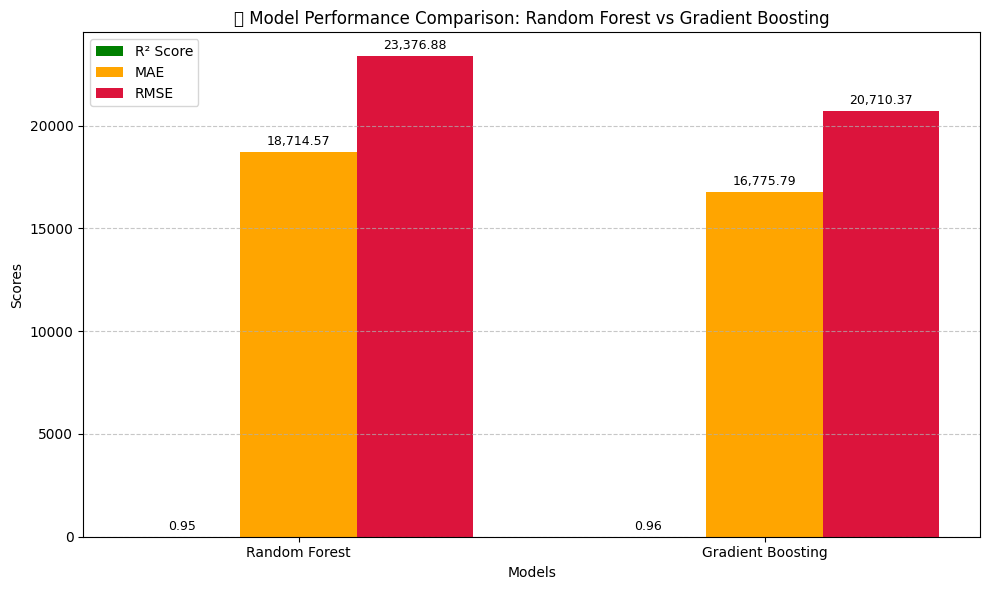

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
models = ['Random Forest', 'Gradient Boosting']

r2_scores = [0.9466, 0.9581]
mae_scores = [18714.57, 16775.79]
rmse_scores = [23376.88, 20710.37]

# Setup bar chart
x = np.arange(len(models))  # the label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, r2_scores, width, label='R² Score', color='green')
bars2 = ax.bar(x, mae_scores, width, label='MAE', color='orange')
bars3 = ax.bar(x + width, rmse_scores, width, label='RMSE', color='crimson')

# Labels and formatting
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('🔍 Model Performance Comparison: Random Forest vs Gradient Boosting')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()


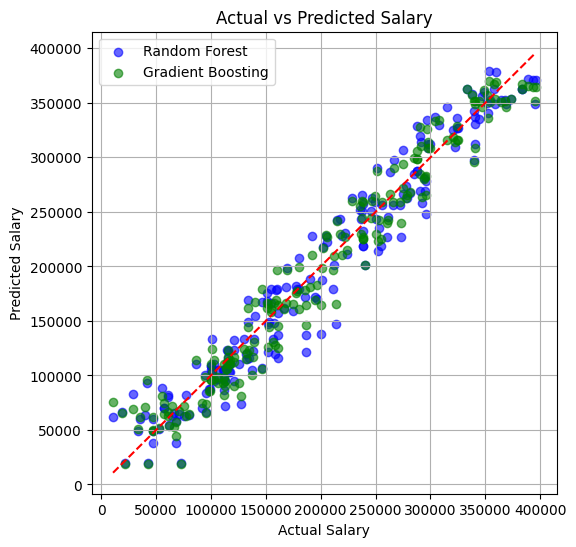

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_actual, rf_preds, alpha=0.6, label='Random Forest', color='blue')
plt.scatter(y_test_actual, gb_preds, alpha=0.6, label='Gradient Boosting', color='green')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
!pip install streamlit pyngrok --quiet

from pyngrok import ngrok

# Kill existing tunnels (if any)
ngrok.kill()

# Set your auth token
ngrok.set_auth_token("30BvkAeQfb8DSeIAWAs0WJNs8z3_7dBcbxdJNDqUD3kTcFyiy")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [16]:
%%writefile salary_app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Page configuration
st.set_page_config(page_title="Salary Predictor by Age & Experience", page_icon="📈", layout="wide")

# CSS Styling
st.markdown("""
    <style>
        .main {
            background: linear-gradient(to right, #eef2f3, #8e9eab);
        }
        .block-container {
            padding: 2rem 2rem;
        }
        .stButton>button {
            background-color: #00A86B;
            color: white;
            font-weight: 600;
            border-radius: 0.5rem;
            height: 3rem;
            width: 100%;
        }
        h1, h2, h3 {
            color: #003366;
        }
    </style>
""", unsafe_allow_html=True)

# App Title
st.markdown("<h1 style='text-align: center;'>Predict Salary Based on Age & Experience</h1>", unsafe_allow_html=True)
st.markdown("---")

# Instructions
with st.expander("How to Use This App"):
    st.markdown("""
        - Upload a CSV file with the following **columns**:
            - `Experience_Years`
            - `Age`
            - `Gender` (Male/Female)
            - `Salary` (optional)
        - Enter an **Age** and **Years of Experience**.
        - The app will:
            - Train a Gradient Boosting model on your dataset
            - Filter rows that match both inputs
            - Predict salary for each
            - Show predictions alongside actual salary (if present)
    """)

# Upload CSV
uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])
required_cols = {'Experience_Years', 'Age', 'Gender'}

if uploaded_file:
    try:
        df = pd.read_csv(uploaded_file)

        if not required_cols.issubset(df.columns):
            missing = required_cols - set(df.columns)
            st.error(f"Missing columns: `{', '.join(missing)}`")
        else:
            df = df.dropna(subset=['Experience_Years', 'Age', 'Gender'])

            # Map gender to numeric
            df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

            # Check if Salary exists
            has_salary = 'Salary' in df.columns
            if has_salary:
                df = df.dropna(subset=['Salary'])
                df['Log_Salary'] = np.log1p(df['Salary'])
                y = df['Log_Salary']
            else:
                y = np.random.normal(loc=10, scale=1, size=len(df))  # dummy y
                st.warning("No Salary column found. Predictions will be approximate.")

            # Train model on full dataset using Gradient Boosting
            X = df[['Experience_Years', 'Age', 'Gender']]
            model = GradientBoostingRegressor(n_estimators=100, random_state=42)
            model.fit(X, y)

            # Inputs from user
            user_age = st.number_input("Enter Age", min_value=18, max_value=100, step=1)
            user_exp = st.number_input("Enter Years of Experience", min_value=0.0, max_value=60.0, step=0.5)

            # Filter rows that match both inputs
            filtered_df = df[(df['Age'] == user_age) & (df['Experience_Years'] == user_exp)].copy()

            if filtered_df.empty:
                st.warning(f"No matching records for Age = {user_age} and Experience = {user_exp}")
            else:
                # Predict for filtered rows
                X_filtered = filtered_df[['Experience_Years', 'Age', 'Gender']]
                log_preds = model.predict(X_filtered)
                salary_preds = np.expm1(log_preds).round(2)
                filtered_df['Predicted_Salary'] = salary_preds

                # Format gender back to text
                filtered_df['Gender'] = filtered_df['Gender'].map({0: 'Male', 1: 'Female'})

                # Display results
                st.success("Prediction Completed")
                st.markdown(f"### Predicted Salaries for Age {user_age} and Experience {user_exp}")
                columns_to_show = ['Experience_Years', 'Age', 'Gender', 'Predicted_Salary']
                if has_salary:
                    columns_to_show.append('Salary')

                st.dataframe(filtered_df[columns_to_show]
                             .style.format({'Predicted_Salary': '₹{:,.2f}', 'Salary': '₹{:,.2f}'}))

                # Download results
                st.download_button("Download Results as CSV",
                                   data=filtered_df[columns_to_show].to_csv(index=False),
                                   file_name=f"salary_predictions_age{user_age}_exp{user_exp}.csv",
                                   mime="text/csv")

    except Exception as e:
        st.error(f"Error processing file: {e}")
else:
    st.info("Please upload a CSV file to begin.")


Writing salary_app.py


In [17]:
from pyngrok import ngrok

# Kill existing tunnels if rerunning
ngrok.kill()

# Open a tunnel to streamlit port 8501
public_url = ngrok.connect(8501)
print(f"🌐 Streamlit app running at: {public_url}")

# Launch Streamlit app
!streamlit run salary_app.py &> /dev/null &


🌐 Streamlit app running at: NgrokTunnel: "https://5a8473804b73.ngrok-free.app" -> "http://localhost:8501"
